## Data UnderStanding

- id - a unique identifier for each trip

- vendor_id - a code indicating the provider associated with the trip record

- pickup_datetime - date and time when the meter was engaged

- dropoff_datetime - date and time when the meter was disengaged

- passenger_count - the number of passengers in the vehicle (driver entered value)

- pickup_longitude - the longitude where the meter was engaged

- pickup_latitude - the latitude where the meter was engaged

- dropoff_longitude - the longitude where the meter was disengaged

- dropoff_latitude - the latitude where the meter was disengaged

- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle 
  memory before sending to the vendor because the vehicle did not have a connection 
  to the server – Y=store and forward; N=not a store and forward trip

- trip_duration - duration of the trip in seconds


## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")

## Get Data

In [2]:
df_train = pd.read_csv(r'E:\ML\projects\1 project-nyc-taxi-trip-duration\split\train.csv')
df_val = pd.read_csv(r'E:\ML\projects\1 project-nyc-taxi-trip-duration\split\val.csv')

## Data Exploration

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [4]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229319 entries, 0 to 229318
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  229319 non-null  object 
 1   vendor_id           229319 non-null  int64  
 2   pickup_datetime     229319 non-null  object 
 3   passenger_count     229319 non-null  int64  
 4   pickup_longitude    229319 non-null  float64
 5   pickup_latitude     229319 non-null  float64
 6   dropoff_longitude   229319 non-null  float64
 7   dropoff_latitude    229319 non-null  float64
 8   store_and_fwd_flag  229319 non-null  object 
 9   trip_duration       229319 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 17.5+ MB


In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1000000.0,1.534793,0.498788,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1000000.0,1.665353,1.315723,0.000000,1.000000,1.000000,2.000000,7.000000e+00
pickup_longitude,1000000.0,-73.973475,0.065404,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1000000.0,40.750947,0.033745,34.359695,40.737372,40.754131,40.768379,5.188108e+01
dropoff_longitude,1000000.0,-73.973421,0.065432,-121.933304,-73.991341,-73.979767,-73.963036,-6.133553e+01
dropoff_latitude,1000000.0,40.751829,0.035782,34.359695,40.735928,40.754551,40.769833,4.392103e+01
trip_duration,1000000.0,954.884971,3882.070116,1.000000,397.000000,662.000000,1074.000000,2.227612e+06


In [6]:
df_val.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,229319.0,1.535433,0.498744,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,229319.0,1.660948,1.309202,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,229319.0,-73.973321,0.042504,-79.569733,-73.991852,-73.981720,-73.967308,-6.877843e+01
pickup_latitude,229319.0,40.750846,0.032655,34.712234,40.737354,40.754005,40.768291,4.245894e+01
dropoff_longitude,229319.0,-73.973283,0.041215,-80.355431,-73.991280,-73.979729,-73.963013,-6.877843e+01
dropoff_latitude,229319.0,40.751758,0.038686,32.181141,40.735771,40.754436,40.769760,4.245894e+01
trip_duration,229319.0,980.652842,9099.546281,1.000000,397.000000,664.000000,1076.000000,3.526282e+06


## Duplicates

In [7]:
df_train.duplicated().sum()

np.int64(0)

## EDA && Feature Engineering

### Explore Pickup DateTime

In [8]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_val['pickup_datetime'] = pd.to_datetime(df_val['pickup_datetime'])

In [9]:
print(f'statring date : {min(df_train['pickup_datetime'] )} and last date : {max(df_train['pickup_datetime'] )}')
date_range = (df_train['pickup_datetime'].max() - df_train['pickup_datetime'].min()).days + 1
print(f"The date range: {date_range} days")

statring date : 2016-01-01 00:00:53 and last date : 2016-06-30 23:59:37
The date range: 182 days


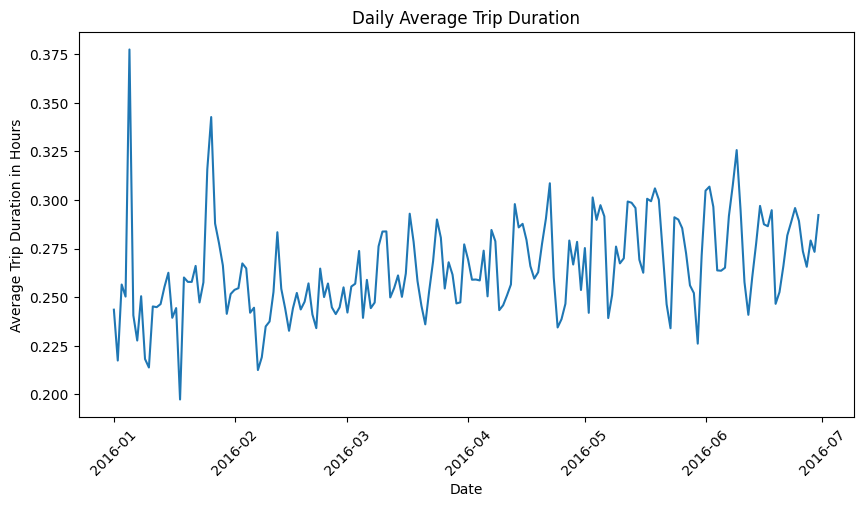

In [10]:
df_train['trip_duration_hour'] =  df_train['trip_duration'] / 3600 
group = df_train.groupby(df_train['pickup_datetime'].dt.date)['trip_duration_hour'].mean()

plt.figure(figsize=(10,5))
plt.plot(group.index, group.values)   # index = dates, values = mean trip duration
plt.xlabel('Date')
plt.ylabel('Average Trip Duration in Hours')
plt.title('Daily Average Trip Duration')
plt.xticks(rotation=45)
plt.show()


In [11]:
# We don't need year column since it's one value 2016

df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_val['pickup_month'] = df_val['pickup_datetime'].dt.month

df_train['pickup_day'] = df_train['pickup_datetime'].dt.day
df_val['pickup_day'] = df_val['pickup_datetime'].dt.day

df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_val['pickup_hour'] = df_val['pickup_datetime'].dt.hour



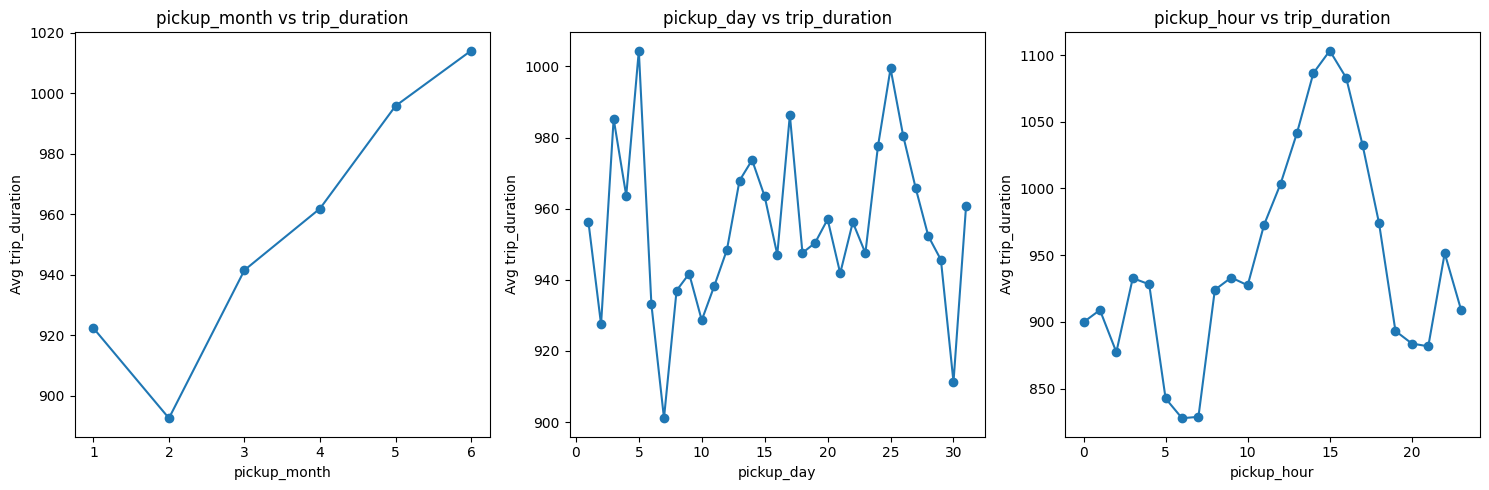

In [12]:

features = ['pickup_month', 'pickup_day', 'pickup_hour']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    
    # Group by feature and take mean of trip_duration
    grouped = df_train.groupby(feature)['trip_duration'].mean()
    
    plt.plot(grouped.index, grouped.values, marker='o')
    plt.xlabel(feature)
    plt.ylabel("Avg trip_duration")
    plt.title(f"{feature} vs trip_duration")

plt.tight_layout()
plt.show()


 <pre>we see that the trip duration withing 10 to 20 hours are high due to jam since it's the time of work
we see positive correlation between months and trip duration except month 1</pre>

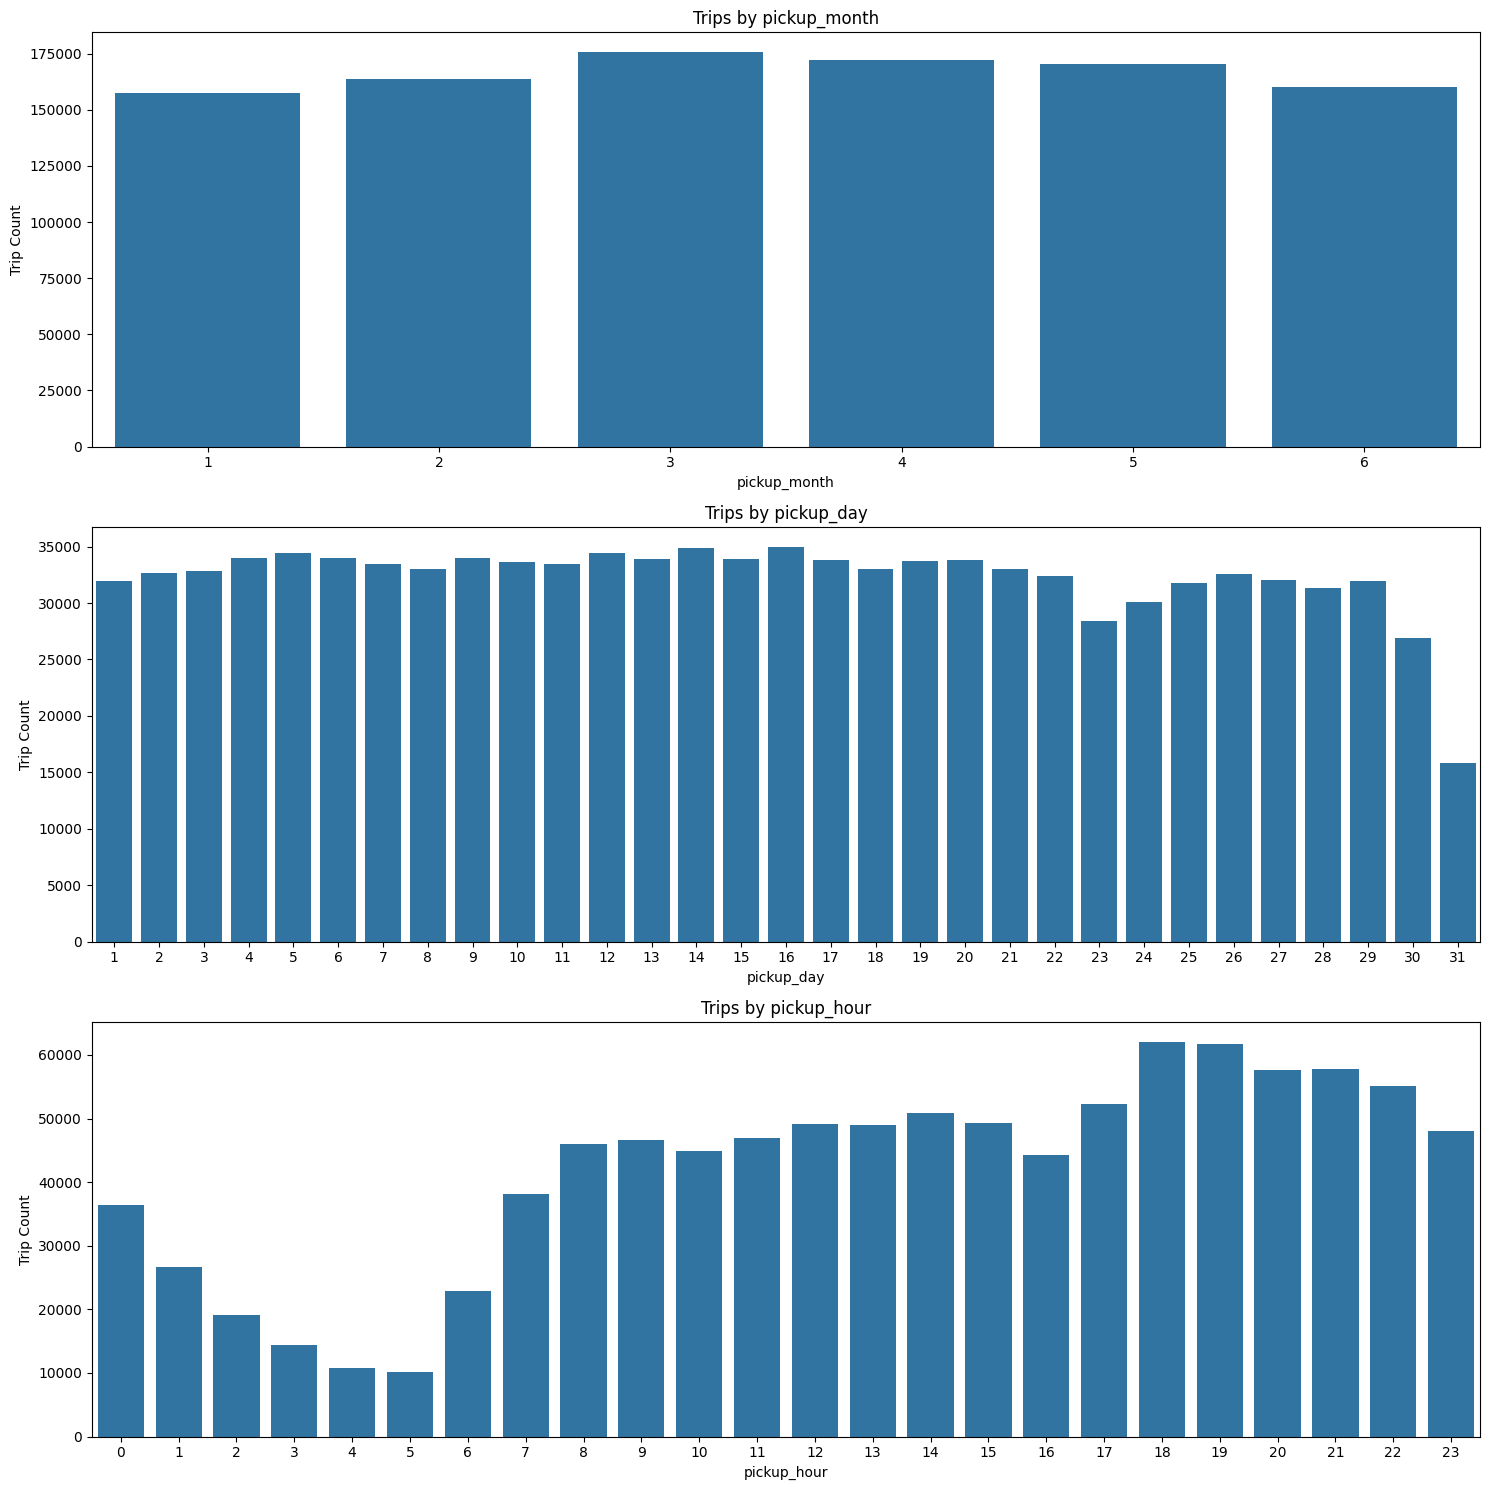

In [13]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    
    # Group by feature and take mean of trip_duration
    grouped = df_train.groupby(feature)['trip_duration'].mean()
    
    sns.countplot(x=f'{feature}', data=df_train)
    plt.title(f'Trips by {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Trip Count')

plt.tight_layout()
plt.show()


In [14]:
df_train['pickup_weekday'] = df_train['pickup_datetime'].dt.weekday
df_val['pickup_weekday'] = df_val['pickup_datetime'].dt.weekday
df_train['is_weekend'] = df_train['pickup_weekday'].isin([5,6]).astype(int) # saturday and sunday
df_val['is_weekend'] = df_val['pickup_weekday'].isin([5,6]).astype(int)
df_train['rush_hour'] = df_train['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)
df_val['rush_hour'] = df_val['pickup_hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)

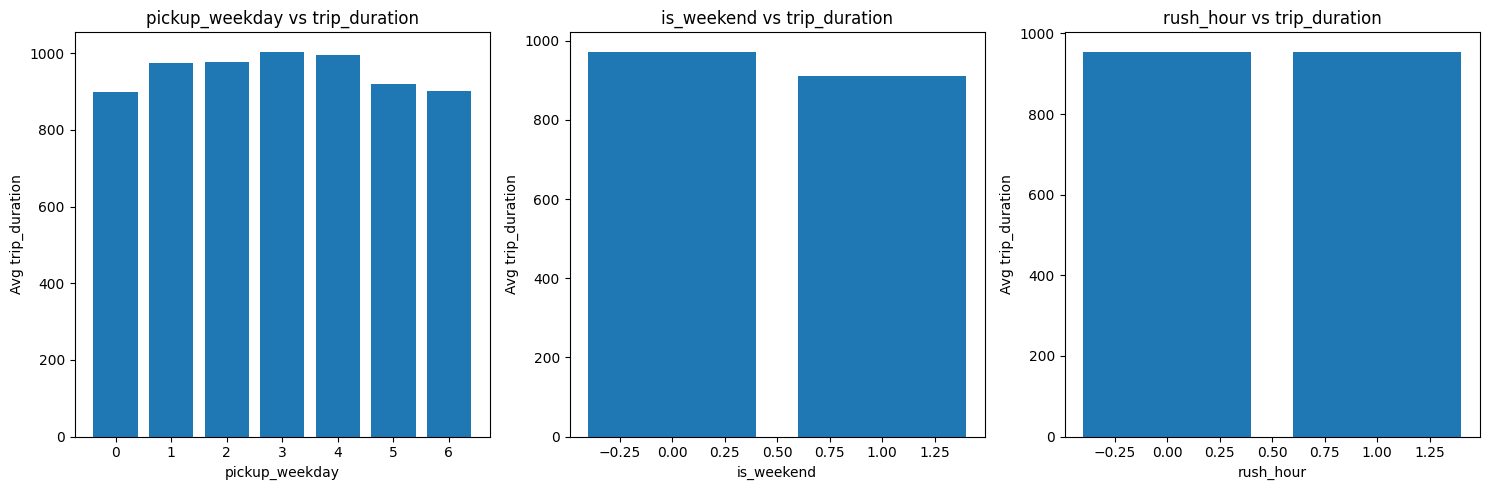

In [15]:
features = ['pickup_weekday', 'is_weekend', 'rush_hour']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    
    # Group by feature and take mean of trip_duration
    grouped = df_train.groupby(feature)['trip_duration'].mean()
    
    plt.bar(grouped.index, grouped.values)
    plt.xlabel(feature)
    plt.ylabel("Avg trip_duration")
    plt.title(f"{feature} vs trip_duration")

plt.tight_layout()
plt.show()


<pre>
    in weekend the traffic is quiet
    we see monday is the quitiest day 
</pre>

### Explore Latitude and Longitude

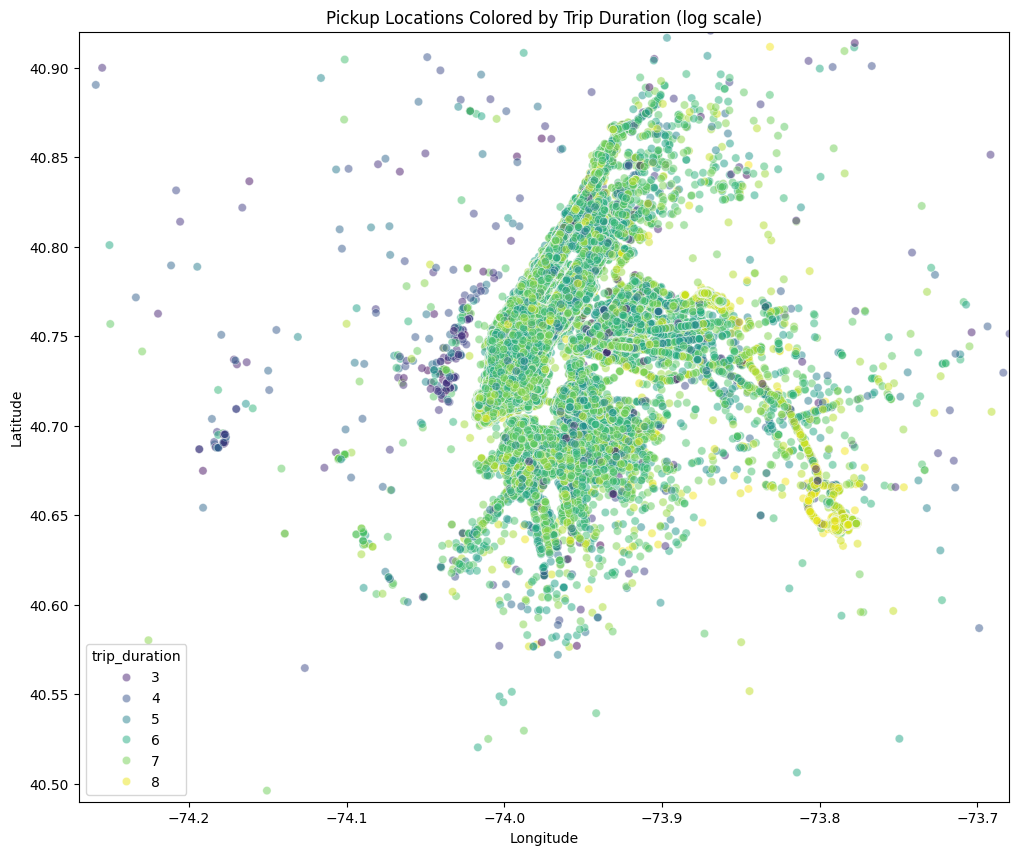

In [16]:
# Filter out extreme outliers
mask = (df_train['trip_duration'] <= 3600) & (df_train['trip_duration'] > 10)
filtered = df_train[mask]

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=filtered,
    x='pickup_longitude',
    y='pickup_latitude',
    hue=np.log1p(filtered['trip_duration']),  # log scale for color
    palette='viridis',
    alpha=0.5,
    legend=True
)
plt.title('Pickup Locations Colored by Trip Duration (log scale)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.27, -73.68)
plt.ylim(40.49, 40.92)
plt.show()


<pre>
the yellow points represent high trip duration , which appear in bottom right, the JFK International Airport , since the trip usually travel to outer place  
</pre>

In [17]:
# this data for New York City so we discover if there trip far from it
'''
new york coordinates:
Latitude:
Minimum: 40.49° N
Maximum: 40.92° N
Longitude:
Minimum: -74.27° W
Maximum: -73.68° W
'''
min_lat = 40.49
max_lat = 40.92
min_lon = -74.27
max_lon = -73.68
out_newyork_train = df_train[((df_train['pickup_latitude']<min_lat) & (df_train['pickup_longitude']<min_lon )) | ((df_train['pickup_latitude']>max_lat) & (df_train['pickup_longitude']>max_lon ))]
out_newyork_val = df_val[((df_val['pickup_latitude']<min_lat) & (df_val['pickup_longitude']<min_lon )) | ((df_val['pickup_latitude']>max_lat) & (df_val['pickup_longitude']>max_lon ))]
print(out_newyork_train.shape)
print(out_newyork_val.shape)

(38, 17)
(8, 16)


In [18]:
df_train = pd.concat([df_train, out_newyork_train]).drop_duplicates(keep=False)
df_val = pd.concat([df_val, out_newyork_val]).drop_duplicates(keep=False)

Eucludien distance

In [19]:
# first we get the Eucludien distance
df_train["latitude_distance"]  = df_train["dropoff_latitude"]  -  df_train["pickup_latitude"]
df_train["longitude_distance"] = df_train["dropoff_longitude"] - df_train["pickup_longitude"]

df_val["latitude_distance"]  = df_val["dropoff_latitude"]  - df_val["pickup_latitude"]
df_val["longitude_distance"] = df_val["dropoff_longitude"] - df_val["pickup_longitude"]

df_train['euclidien_distance'] = np.sqrt(df_train["latitude_distance"]**2 + df_train["longitude_distance"]**2)
df_val['euclidien_distance'] = np.sqrt(df_val["latitude_distance"]**2 + df_val["longitude_distance"]**2)



Haversine Distances

In [20]:
def haversine(lat1, lon1, lat2, lon2):
    # convert to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return 6371 * c  # Earth radius in km



In [21]:
# Apply on both train and val
df_train['haversine_distance'] = haversine(
    df_train['pickup_latitude'].values,
    df_train['pickup_longitude'].values,
    df_train['dropoff_latitude'].values,
    df_train['dropoff_longitude'].values
)

df_val['haversine_distance'] = haversine(
    df_val['pickup_latitude'].values,
    df_val['pickup_longitude'].values,
    df_val['dropoff_latitude'].values,
    df_val['dropoff_longitude'].values
)

Bearing( Direction )

In [22]:
# this function compute the direction of the trip from 0 : 360
def compute_bearing(lat1,lon1,lat2,lon2):
    dlon = np.radians(lon2 - lon1)
    
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    # this compute the east-west component
    x = np.sin(dlon) * np.cos(lat2)

    # this compute the North-South component
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dlon))

    # arctan compute the angle between x and y in radians 
    # np.degrees converts to degrees
    # + 360 and % 360 to make the angle within in range [0:360]
    return (np.degrees(np.arctan2(x, y)) + 360) % 360
    

In [23]:
df_train['bearing'] = compute_bearing(df_train["pickup_latitude"],df_train["pickup_longitude"],df_train["dropoff_latitude"],df_train["dropoff_longitude"])
df_val['bearing'] = compute_bearing(df_val["pickup_latitude"],df_val["pickup_longitude"],df_val["dropoff_latitude"],df_val["dropoff_longitude"])


Manhattan Distance

In [24]:
df_train['manhattan_distance'] = np.abs(df_train["latitude_distance"]) + np.abs(df_train["longitude_distance"])
df_val['manhattan_distance'] = np.abs(df_val["latitude_distance"]) + np.abs(df_val["longitude_distance"])

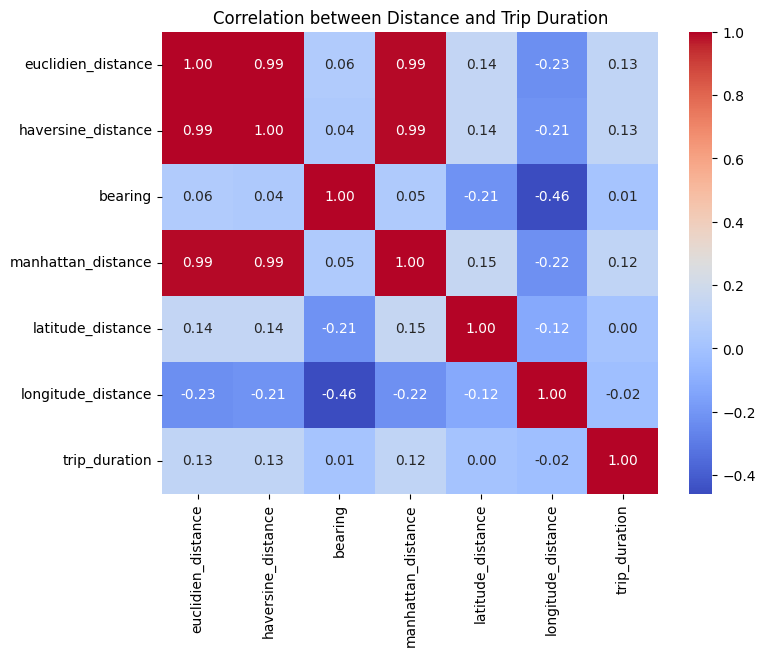

In [25]:
corr = df_train[['euclidien_distance','haversine_distance','bearing','manhattan_distance',"latitude_distance" ,"longitude_distance",'trip_duration']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Distance and Trip Duration")

plt.show()

<pre>
    we see that there is a little correlation between distances and trip duration this might be due to outliers 
    let's work with it
</pre>

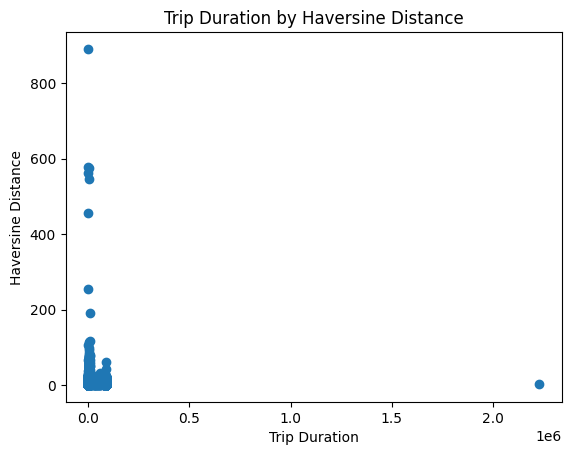

In [26]:
plt.scatter(df_train['trip_duration'],df_train['haversine_distance'])
plt.xlabel('Trip Duration')
plt.ylabel('Haversine Distance')
plt.title('Trip Duration by Haversine Distance')
plt.show()

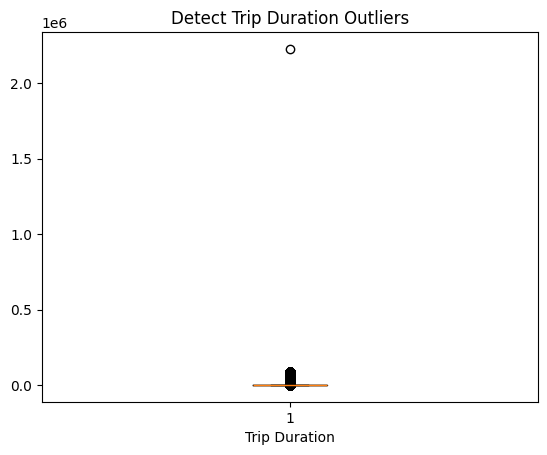

In [27]:
plt.boxplot(df_train['trip_duration'])
plt.xlabel('Trip Duration')
plt.title('Detect Trip Duration Outliers')
plt.show()

In [28]:
Q1 = df_train['trip_duration'].quantile(0.25)
Q3 = df_train['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
filtered_df = df_train[(df_train['trip_duration'] >= lower ) & (df_train['trip_duration'] <= upper )] 


In [29]:
print(f'upper bound is {upper} and lower bound is {lower}')
filtered_df.shape

upper bound is 2089.5 and lower bound is -618.5


(949025, 23)

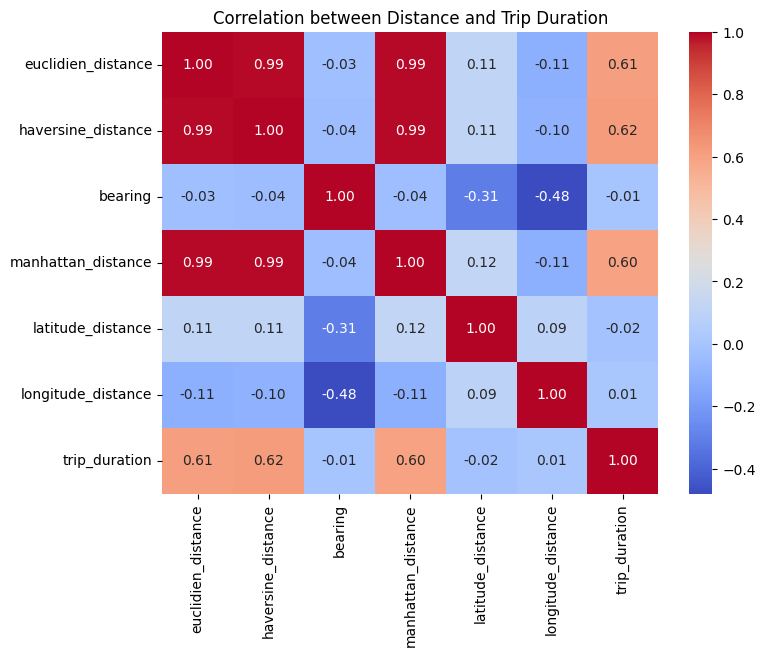

In [30]:
corr = filtered_df[['euclidien_distance','haversine_distance','bearing','manhattan_distance',"latitude_distance" ,"longitude_distance",'trip_duration']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Distance and Trip Duration")

plt.show()

<pre>Now we see that the values change </pre>

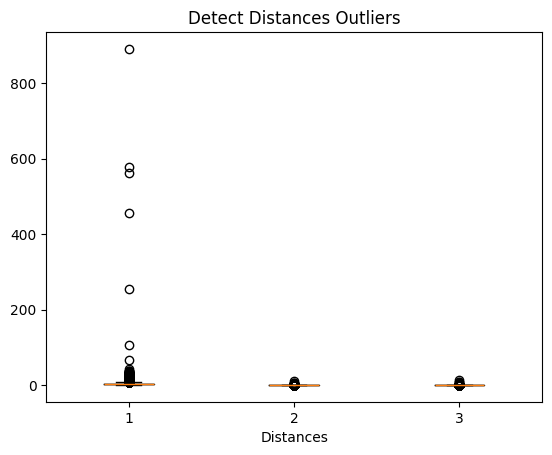

In [31]:
plt.boxplot([filtered_df['haversine_distance'],filtered_df['euclidien_distance'],filtered_df['manhattan_distance']])
plt.xlabel('Distances')
plt.title('Detect Distances Outliers')
plt.show()

In [32]:
upper = 100
filtered_df_new = filtered_df[filtered_df['haversine_distance'] < upper]

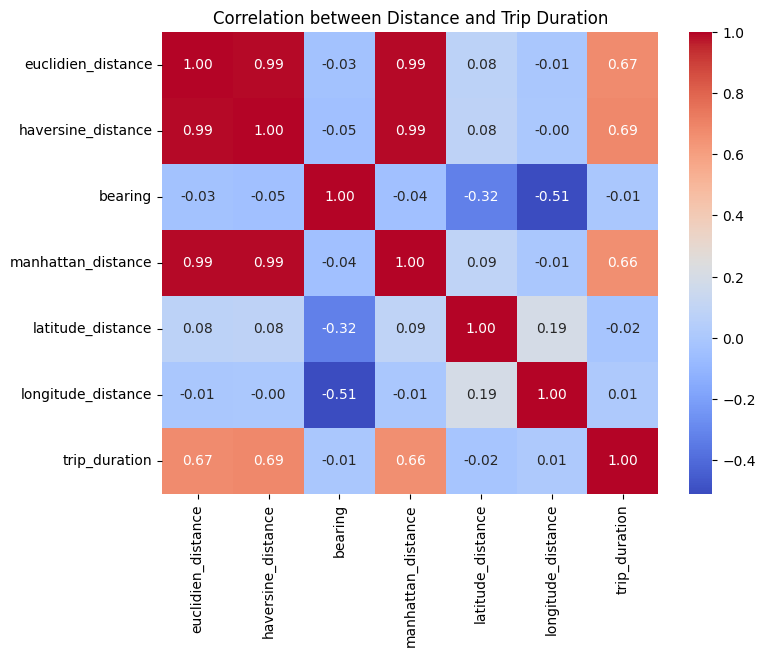

In [33]:
corr = filtered_df_new[['euclidien_distance','haversine_distance','bearing','manhattan_distance',"latitude_distance" ,"longitude_distance",'trip_duration']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Distance and Trip Duration")

plt.show()

<pre>that is fine correlation between distances and trip duartion
we can then select haversin to be our distance to avoid multicollinearity
</pre>

In [34]:
df_train = filtered_df_new
df_train.shape

(949019, 23)

### Cluster

In [35]:
from sklearn.cluster import MiniBatchKMeans

# Stack all pickup and dropoff coordinates from train and val sets
coords = np.vstack((
    df_train[['pickup_latitude', 'pickup_longitude']].values,
    df_train[['dropoff_latitude', 'dropoff_longitude']].values,
    df_val[['pickup_latitude', 'pickup_longitude']].values,
    df_val[['dropoff_latitude', 'dropoff_longitude']].values
))

kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000, random_state=42).fit(coords)

# Predict clusters
df_train.loc[:, 'pickup_cluster']  = kmeans.predict(df_train[['pickup_latitude','pickup_longitude']].values)
df_train.loc[:, 'dropoff_cluster'] = kmeans.predict(df_train[['dropoff_latitude','dropoff_longitude']].values)

df_val.loc[:, 'pickup_cluster']  = kmeans.predict(df_val[['pickup_latitude','pickup_longitude']].values)
df_val.loc[:, 'dropoff_cluster'] = kmeans.predict(df_val[['dropoff_latitude','dropoff_longitude']].values)

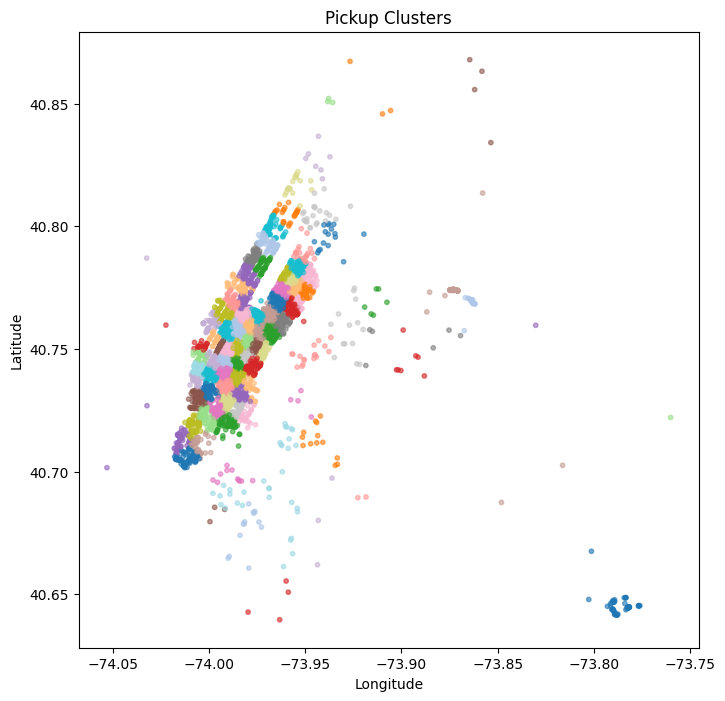

In [36]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['latitude', 'longitude'])

sample = df_train.sample(5000, random_state=42)

plt.figure(figsize=(8,8))
plt.scatter(sample['pickup_longitude'], sample['pickup_latitude'],
            c=sample['pickup_cluster'], cmap='tab20', s=10, alpha=0.6)
plt.title('Pickup Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [37]:
# Create combined cluster pair feature 
df_train['cluster_pair'] = list(zip(df_train['pickup_cluster'], df_train['dropoff_cluster'])) 
df_val['cluster_pair'] = list(zip(df_val['pickup_cluster'], df_val['dropoff_cluster'])) 
# Compute mean trip duration per pair 
gby = df_train.groupby('cluster_pair')['trip_duration'].mean().to_dict() 
# Map mean duration back as a feature 
df_train['avg_duration_by_clusterpair'] = df_train['cluster_pair'].map(gby) 
df_val['avg_duration_by_clusterpair'] = df_val['cluster_pair'].map(gby)


In [38]:
# Convert dict to DataFrame
gby_df = pd.DataFrame(
    [(k[0], k[1], v) for k, v in gby.items()],
    columns=['pickup_cluster', 'dropoff_cluster', 'avg_duration_by_clusterpair']
)

In [39]:
joblib.dump(kmeans, "kmeans.pkl")
gby_df.to_csv('cluster_pair_avg_duration.csv', index=False)

### Explore Categorical Features

### Passenger Count

In [40]:
print(df_train['passenger_count'].unique())

[1 5 2 3 6 4 0 7]


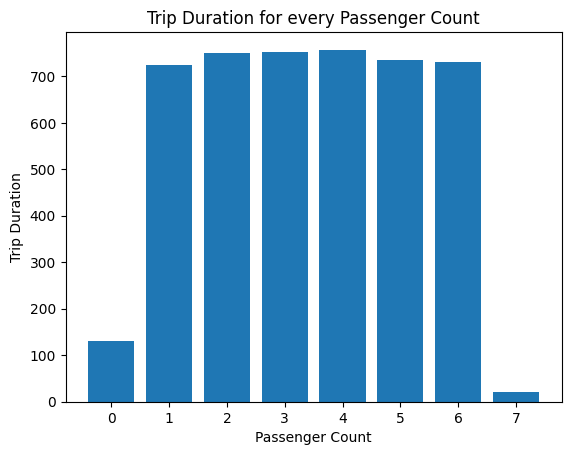

In [41]:
group = df_train.groupby(df_train['passenger_count'])['trip_duration'].mean()
plt.bar(group.index,group.values)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration')
plt.title('Trip Duration for every Passenger Count')
plt.show()

In [42]:
df_train['passenger_count'].value_counts()

passenger_count
1    674610
2    135138
5     50689
3     38728
6     31541
4     18274
0        37
7         2
Name: count, dtype: int64

In [43]:
# we see that 0 and 7 are outliers , we can delete it
upper , lower = 7 , 0
df_train = df_train[(df_train['passenger_count'] > lower) & (df_train['passenger_count'] < upper)]

### store and fwd flag

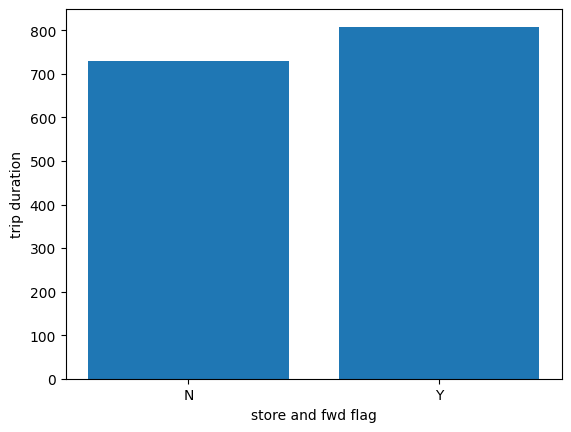

In [44]:
group = df_train.groupby(df_train['store_and_fwd_flag'])['trip_duration'].mean()
plt.bar(group.index,group.values)
plt.xlabel('store and fwd flag')
plt.ylabel('trip duration')
plt.show()

### vendor id

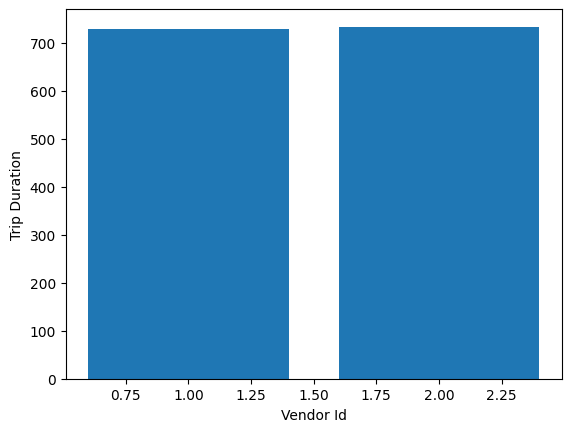

In [45]:
group = df_train.groupby(df_train['vendor_id'])['trip_duration'].mean()
plt.bar(group.index,group.values)
plt.xlabel('Vendor Id')
plt.ylabel('Trip Duration')
plt.show()

In [46]:
# Initialize encoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training, transform both
cat_train = pd.DataFrame(enc.fit_transform(df_train[['passenger_count','store_and_fwd_flag','vendor_id','pickup_month','pickup_hour', 'pickup_weekday']]),
                            columns=enc.get_feature_names_out(['passenger_count','store_and_fwd_flag','vendor_id','pickup_month','pickup_hour', 'pickup_weekday']),
                            index=df_train.index)

cat_val = pd.DataFrame(enc.transform(df_val[['passenger_count','store_and_fwd_flag','vendor_id','pickup_month','pickup_hour', 'pickup_weekday']]),
                          columns=enc.get_feature_names_out(['passenger_count','store_and_fwd_flag','vendor_id','pickup_month','pickup_hour', 'pickup_weekday']),
                          index=df_val.index)


# Concatenate back
df_train = pd.concat([df_train, cat_train], axis=1)
df_val = pd.concat([df_val, cat_val], axis=1)

In [47]:
joblib.dump(enc, "encoder.pkl")

['encoder.pkl']

## Target Feature

In [48]:
print(f'min value of trip duration {min(df_train['trip_duration'])} and max value {max(df_train['trip_duration'])}')

min value of trip duration 1 and max value 2089


In [49]:
df_train['trip_duration_min'] = df_train['trip_duration'] / 60

In [50]:

# Create 15-minute bins (0–35 mins)
bins = np.arange(0, 36, 5)
labels = [f"{i}-{i+5}" for i in bins[:-1]]


trip_counts = pd.cut(df_train['trip_duration_min'], bins=bins, labels=labels, right=False).value_counts().sort_index()

trip_stats = pd.DataFrame({
    'Duration Interval (min)': trip_counts.index,
    'Trip Count': trip_counts.values
})

trip_stats

,Duration Interval (min),Trip Count
0,0-5,151260
1,5-10,295789
2,10-15,216719
3,15-20,133615
4,20-25,78840
5,25-30,46209
6,30-35,26548


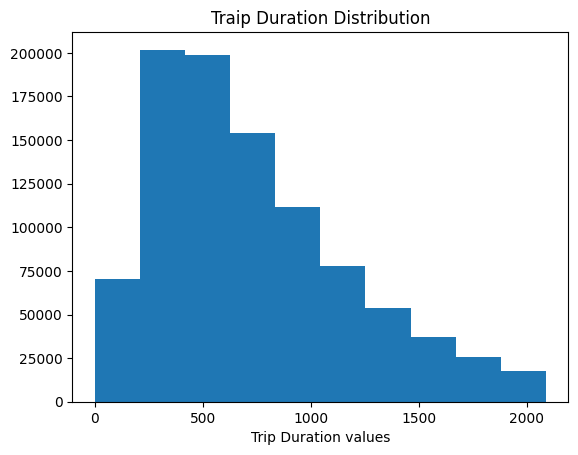

In [51]:
plt.hist(df_train['trip_duration'])
plt.xlabel('Trip Duration values')
plt.title('Traip Duration Distribution')
plt.show()

In [52]:
# we will apply log1p to trip duration to dominate the right skweness
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration']) 
df_val['log_trip_duration'] = np.log1p(df_val['trip_duration']) 

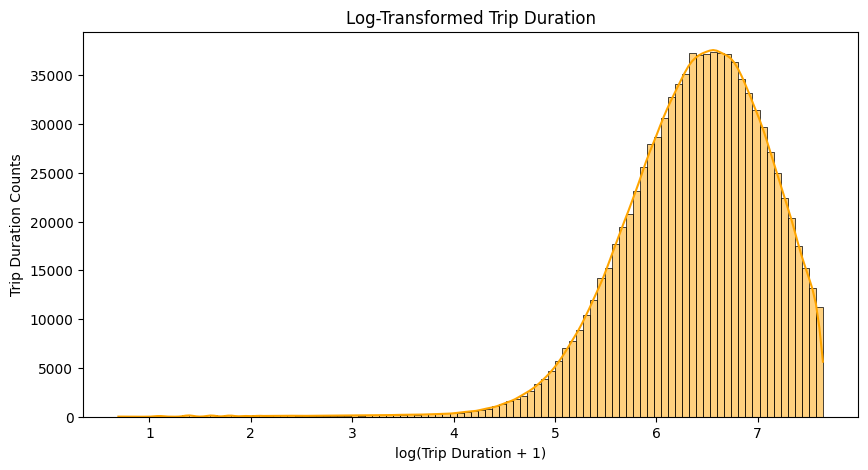

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df_train['trip_duration']), bins=100, kde=True, color='orange')
plt.title('Log-Transformed Trip Duration')
plt.xlabel('log(Trip Duration + 1)')
plt.ylabel('Trip Duration Counts')
plt.show()

 the data concentrated from 5 to 7+ -> (2.5 to 35 minutes)

### Saving File

In [54]:
print(df_train.columns)
print(df_val.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_duration_hour', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_weekday', 'is_weekend', 'rush_hour', 'latitude_distance',
       'longitude_distance', 'euclidien_distance', 'haversine_distance',
       'bearing', 'manhattan_distance', 'pickup_cluster', 'dropoff_cluster',
       'cluster_pair', 'avg_duration_by_clusterpair', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_1', 'vendor_id_2', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_

In [55]:
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'is_weekend', 'rush_hour' ,'haversine_distance','passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_1', 'vendor_id_2', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23', 'pickup_weekday_0', 'pickup_weekday_1',
       'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4',
       'pickup_weekday_5', 'pickup_weekday_6','pickup_cluster' , 'dropoff_cluster' ,'avg_duration_by_clusterpair','log_trip_duration' ]
print(len(features))

58


In [56]:
df_train = df_train[features]
df_val = df_val[features]

In [57]:
df_train.to_csv("df_train.csv",index=False)
df_val.to_csv("df_val.csv",index=False)